# Plot a stacked bar as circles

Stacked bar charts are awful, lets make a better plot with circles. 

Inspired by this [stack overflow](https://stackoverflow.com/questions/59381273/heatmap-with-circles-indicating-size-of-population) post

In [1]:
import os
import sys

import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import pandas as pd

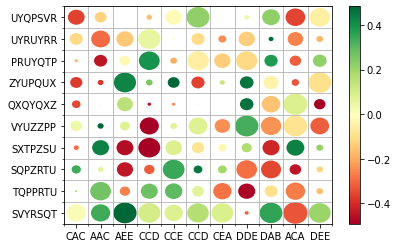

In [99]:


N = 10
M = 11
ylabels = ["".join(np.random.choice(list("PQRSTUVXYZ"), size=7)) for _ in range(N)]
xlabels = ["".join(np.random.choice(list("ABCDE"), size=3)) for _ in range(M)]

x, y = np.meshgrid(np.arange(M), np.arange(N))
s = np.random.randint(0, 180, size=(N,M))
c = np.random.rand(N, M)-0.5

fig, ax = plt.subplots()

R = s/s.max()/2
circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
col = PatchCollection(circles, array=c.flatten(), cmap="RdYlGn")
ax.add_collection(col)

ax.set(xticks=np.arange(M), yticks=np.arange(N),
       xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)
ax.grid(which='minor')

fig.colorbar(col)
plt.show()

In [100]:
# read some data
df = pd.read_csv("kraken_families.tsv", delimiter="\t")
df = df[df.iloc[:, 1:].sum(axis = 1) > 0]
df = df.set_index('Family')
df

,108SS_week_0_S11,108SS_week_12_S13,108SS_week_16_S14,108SS_week_20_S15,108SS_week_28_S16,108SS_week_32_S1733,108SS_week_36_S18,108SS_week_40_S19,108SS_week_44_S20,108SS_week_48_S21,108SS_week_4_S12,108SS_week_52_S22
Family,,,,,,,,,,,,
Acidobacteria,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.00,0.01
Actinobacteria,0.16,0.47,0.68,1.09,4.85,0.76,0.45,0.78,0.40,0.38,0.32,0.31
Bacteroidetes,5.27,13.14,2.34,6.29,5.62,14.64,4.79,14.42,10.28,8.65,24.29,4.94
Chlorobi,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00
Chloroflexi,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.01
Chordata,76.32,0.15,0.08,0.05,0.05,0.28,0.05,0.39,0.09,0.13,0.13,0.08
Cyanobacteria,0.00,0.02,0.03,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
Deinococcus-Thermus,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
Euryarchaeota,0.02,0.04,0.04,0.08,0.92,0.89,0.03,0.15,0.77,0.04,0.04,0.04


In [101]:
samplename = re.sub(r'^(\d+\w+)_week.*$', r'\1', df.columns[0])
xlabels = {int(re.sub(r'^.*week_(\d+).*$', r'\1', x)):df[x] for x in df.columns}
df2 = pd.DataFrame()
for x in sorted(xlabels.keys(), reverse=True):
    df2.insert(0, x, xlabels[x])
df = df2
xlabels = df.columns

In [102]:
samplename

'108SS'

In [103]:
ylabels = df.index
M = len(xlabels)
N = len(ylabels)
x, y = np.meshgrid(np.arange(M), np.arange(N))
s = df.to_numpy()

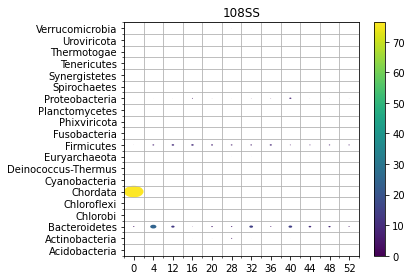

In [105]:
fig, ax = plt.subplots()

R = s/s.max()/2
circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
col = PatchCollection(circles, array=s.flatten(), cmap="viridis") # cmap="RdYlGn"
ax.add_collection(col)

ax.set(xticks=np.arange(M), yticks=np.arange(N),
       xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)
ax.grid(which='minor')

ax.set_title(samplename)

fig.colorbar(col)
plt.tight_layout()
fig.savefig("circles.png")
#plt.show()

In [33]:
xlabels

Index(['105GW_week_0_S14', '105GW_week_12_S16', '105GW_week_16_S17',
       '105GW_week_24_S18', '105GW_week_28_S19', '105GW_week_32_S20',
       '105GW_week_36_S2132', '105GW_week_44_S22', '105GW_week_48_S23',
       '105GW_week_4_S15', '105GW_week_52_S24'],
      dtype='object')

In [43]:

xlabels

['0', '12', '16', '24', '28', '32', '36', '44', '48', '4', '52']

In [35]:
xlab


['0_S14',
 '12_S16',
 '16_S17',
 '24_S18',
 '28_S19',
 '32_S20',
 '36_S2132',
 '44_S22',
 '48_S23',
 '4_S15',
 '52_S24']

In [41]:
s = re.compile()


TypeError: unsupported operand type(s) for &: 'str' and 'int'

['0', '12', '16', '24', '28', '32', '36', '44', '48', '4', '52']

In [66]:
l = '105GW_week_1234_S15'
re.sub(r'^.*week_(\d+).*$', r'\1', l)

'1234'